In [1]:
import numpy as np
import matplotlib.pyplot as plt
import openslide
import cv2 as cv
from define_dataset import define_dataset
from color_distance_bins import color_distance_bins
import time

In [2]:
dataset = define_dataset()
tr_set = dataset.tr_set
test_set = dataset.test_set
results_dict = dataset.results_dict
num_positives = dataset.num_positives
num_negatives = dataset.num_negatives

In [1]:
def calculate_pdl1_score_bins(slide_name, level, ROI_threshold, base_brown, num_bins,
                              use_normalized=False, use_manual_art=False):
    
    wsi_path = '../WSI/thesis_WSI/'+slide_name+'/'+slide_name+'.tiff'
    if use_normalized:
        ROI_map_path = '../WSI/thesis_WSI/'+slide_name+'/roi_'+str(ROI_threshold)+'_enhanced.npy'
    else:
        #loads ROI saved array with indicated threshold applied
        ROI_map_path = '../WSI/thesis_WSI/'+slide_name+'/roi_'+str(ROI_threshold)+'.npy'
    if use_manual_art:
        ROI_map_path = '../WSI/thesis_WSI/'+slide_name+'/roi_'+str(ROI_threshold)+'_manual.npy'
    
    ROI_map_arr = np.load(ROI_map_path)
    
    wsi = openslide.OpenSlide(wsi_path)
    width_in_tiles = ROI_map_arr.shape[1]
    height_in_tiles = ROI_map_arr.shape[0]
    num_ROI_tiles = np.sum(ROI_map_arr>0)

    full_tile_size = int(wsi.dimensions[0]/width_in_tiles)
    level_tile_size = int(full_tile_size/(2**level))
    bins = np.zeros(num_bins)
    for x in range(width_in_tiles):
        print(wsi_path,': col ', x, ' of ', width_in_tiles, end="\r")
        for y in range(height_in_tiles):
            if ROI_map_arr[y][x] == 1:
                tile = wsi.read_region((x*full_tile_size,y*full_tile_size), level, (level_tile_size,level_tile_size))
                bins = np.add(bins,color_distance_bins(tile, base_brown, num_bins=num_bins))
    print('\n')
    
    total_ROI_pixel_area = (level_tile_size*level_tile_size)*num_ROI_tiles
    bins =  np.multiply(np.divide(bins, float(total_ROI_pixel_area)), 100)
    return bins

create normalized hist of pixels color distance from brown distribution for training set

In [5]:
level = 2
ROI_threshold_arr = [0.85, 0.9, 0.95]
base_brown = [117.3, 88.9, 67.3]
num_bins_arr = [200]
use_normalized = True


start_time = time.time()

for ROI_threshold in ROI_threshold_arr:
    for num_bins in num_bins_arr:
        
        wsi_bins_arr = np.empty([len(tr_set), num_bins])
        for i, slide_name in enumerate(tr_set):
            bins = calculate_pdl1_score_bins(slide_name, level, ROI_threshold, base_brown, num_bins, use_normalized=use_normalized)
            wsi_bins_arr[i] = bins
            #print(bins)
            #barContainer = plt.bar(x=range(num_bins), height=bins)
            #plt.title(slide_name)
            #plt.show()


        end_time = time.time()
        print('time: ', "{:.0f}".format(end_time - start_time))
        np.save('../ML_models/bins/bins_arr_'+str(num_bins)+'r'+str(ROI_threshold)+'.npy', wsi_bins_arr)

../WSI/thesis_WSI/19-COMP-004/19-COMP-004.tiff : col  319  of  320

../WSI/thesis_WSI/19-COMP-011/19-COMP-011.tiff : col  215  of  216

../WSI/thesis_WSI/19-COMP-012/19-COMP-012.tiff : col  311  of  312

../WSI/thesis_WSI/19-COMP-014/19-COMP-014.tiff : col  335  of  336

../WSI/thesis_WSI/19-COMP-016/19-COMP-016.tiff : col  335  of  336

../WSI/thesis_WSI/19-COMP-019/19-COMP-019.tiff : col  303  of  304

../WSI/thesis_WSI/19-COMP-029/19-COMP-029.tiff : col  279  of  280

../WSI/thesis_WSI/19-COMP-030/19-COMP-030.tiff : col  367  of  368

../WSI/thesis_WSI/19-COMP-032/19-COMP-032.tiff : col  303  of  30404

../WSI/thesis_WSI/19-COMP-034/19-COMP-034.tiff : col  247  of  248

../WSI/thesis_WSI/20-COMP-050/20-COMP-050.tiff : col  231  of  232

../WSI/thesis_WSI/20-COMP-052/20-COMP-052.tiff : col  343  of  344

../WSI/thesis_WSI/20-COMP-054/20-COMP-054.tiff : col  271  of  272

../WSI/thesis_WSI/20-COMP-071/20-COMP-071.tiff : col  215  of  216

../WSI/thesis_WSI/20-COMP-088/20-COMP-088.tiff

Shows bins array bar plot

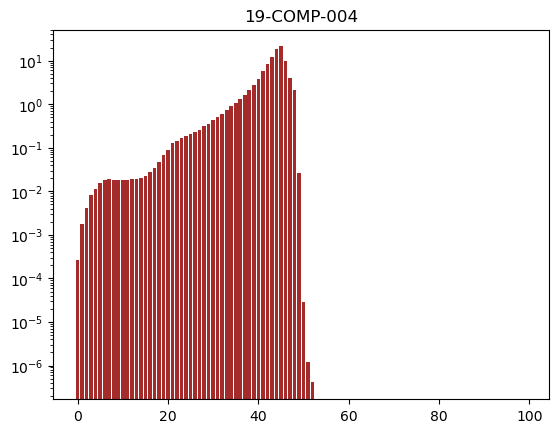

<Figure size 1000x1000 with 0 Axes>

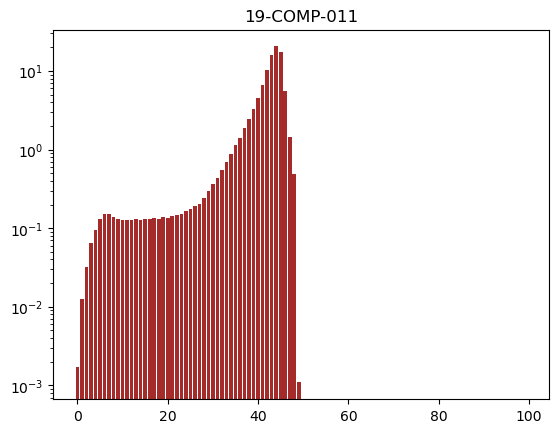

<Figure size 1000x1000 with 0 Axes>

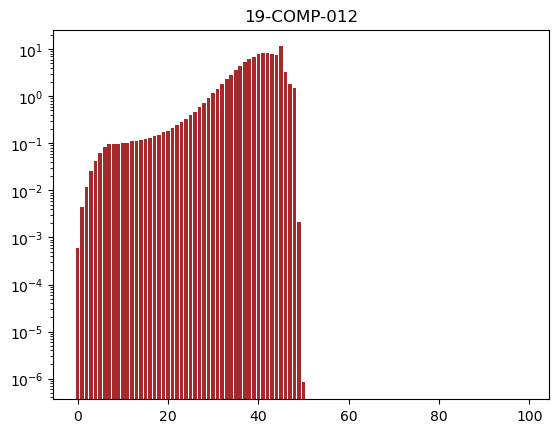

<Figure size 1000x1000 with 0 Axes>

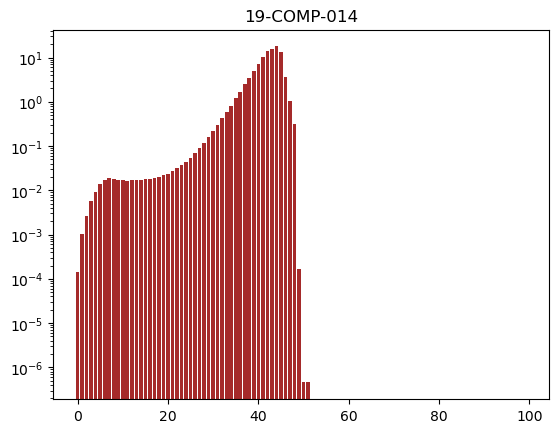

<Figure size 1000x1000 with 0 Axes>

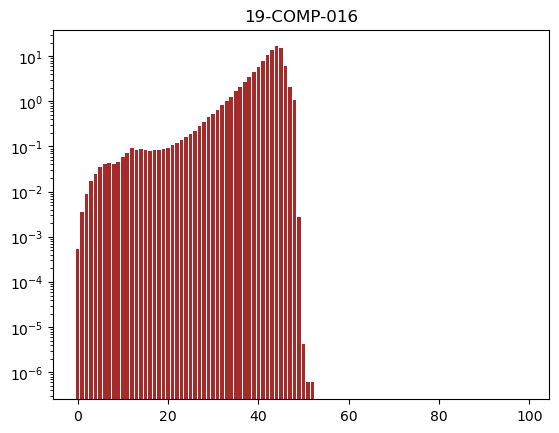

<Figure size 1000x1000 with 0 Axes>

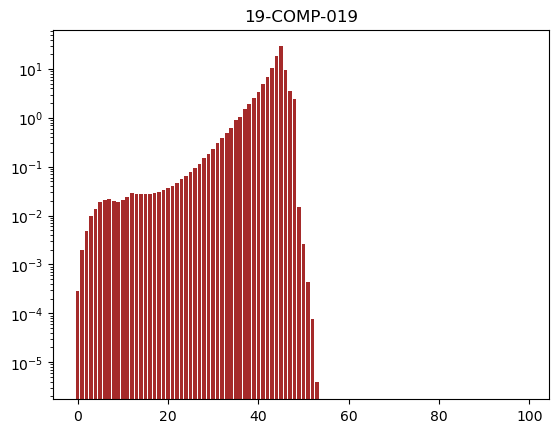

<Figure size 1000x1000 with 0 Axes>

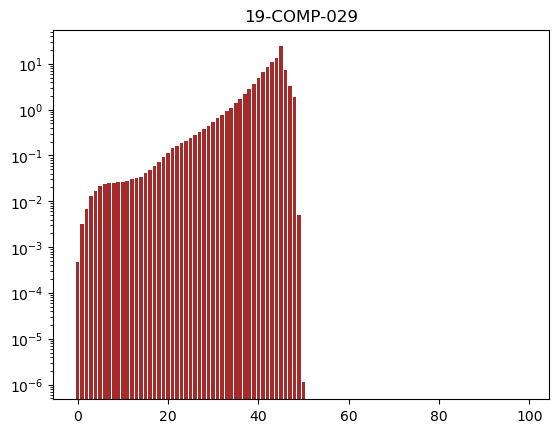

<Figure size 1000x1000 with 0 Axes>

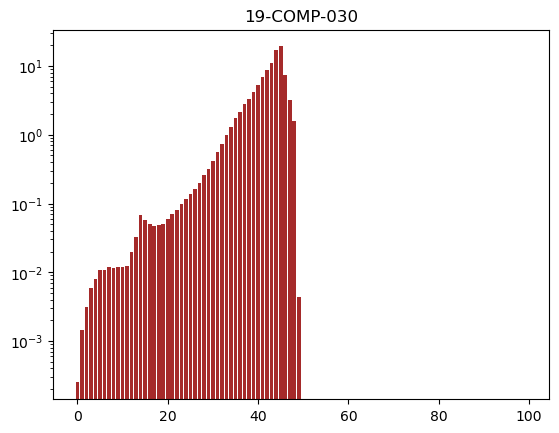

<Figure size 1000x1000 with 0 Axes>

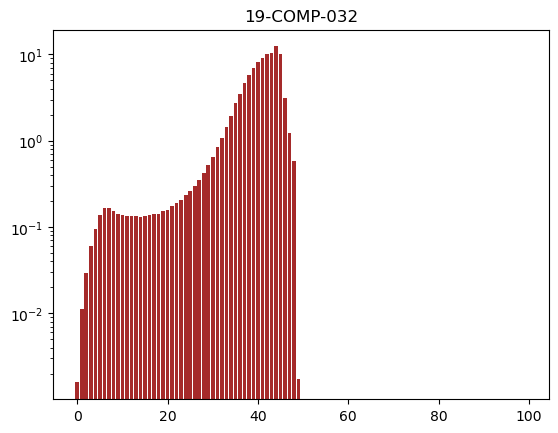

<Figure size 1000x1000 with 0 Axes>

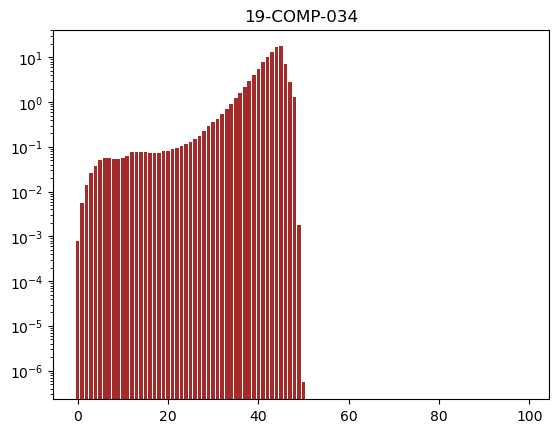

<Figure size 1000x1000 with 0 Axes>

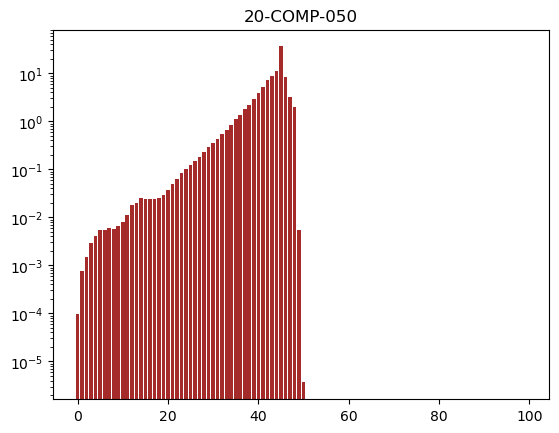

<Figure size 1000x1000 with 0 Axes>

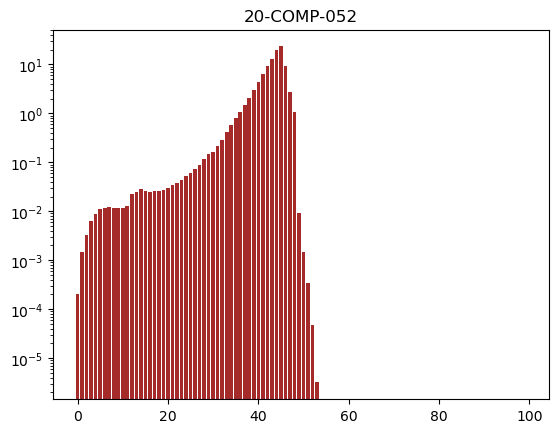

<Figure size 1000x1000 with 0 Axes>

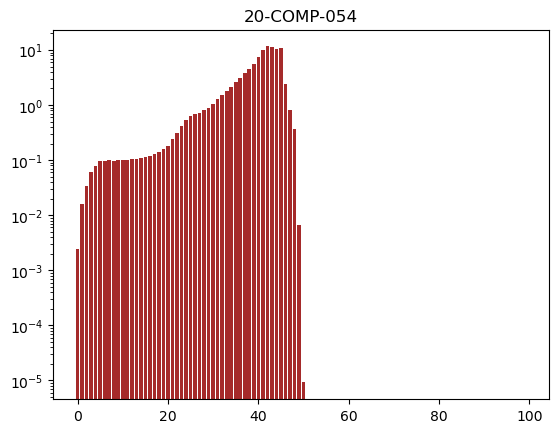

<Figure size 1000x1000 with 0 Axes>

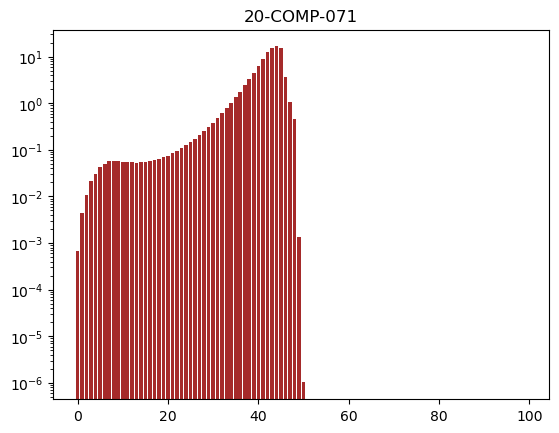

<Figure size 1000x1000 with 0 Axes>

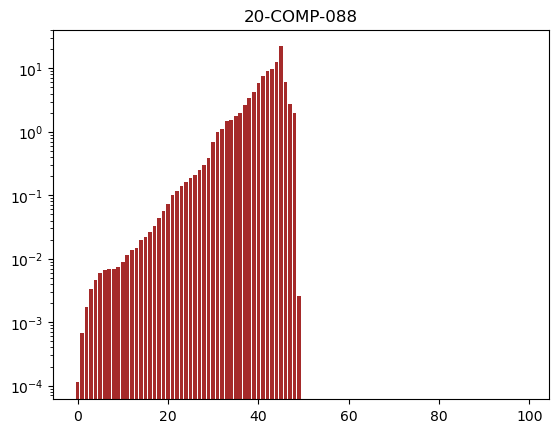

<Figure size 1000x1000 with 0 Axes>

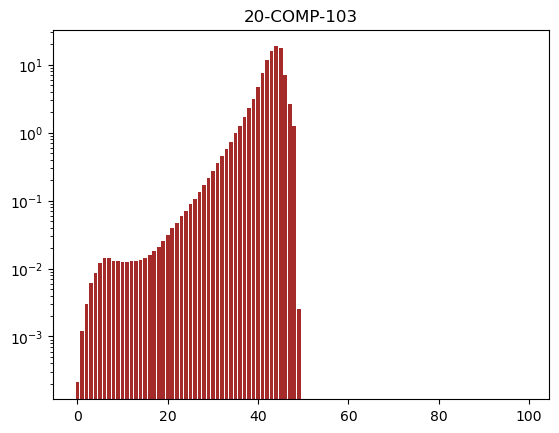

<Figure size 1000x1000 with 0 Axes>

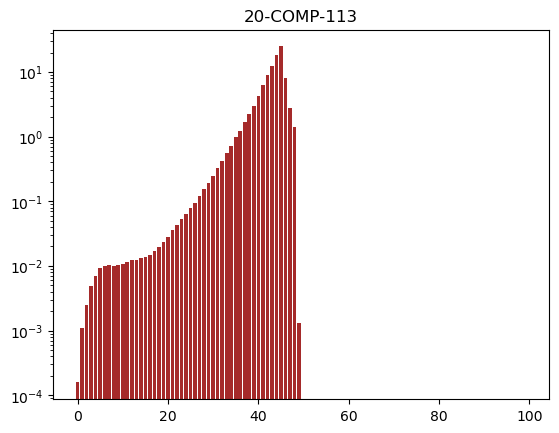

<Figure size 1000x1000 with 0 Axes>

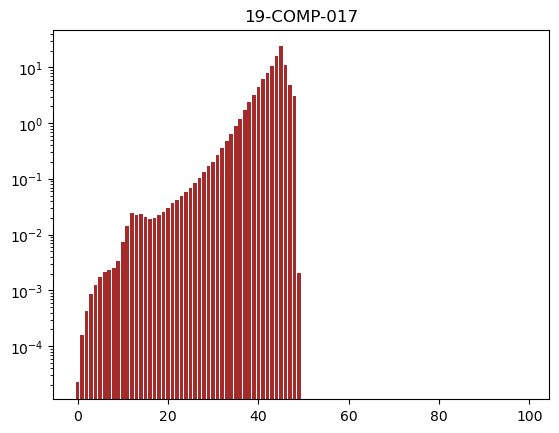

<Figure size 1000x1000 with 0 Axes>

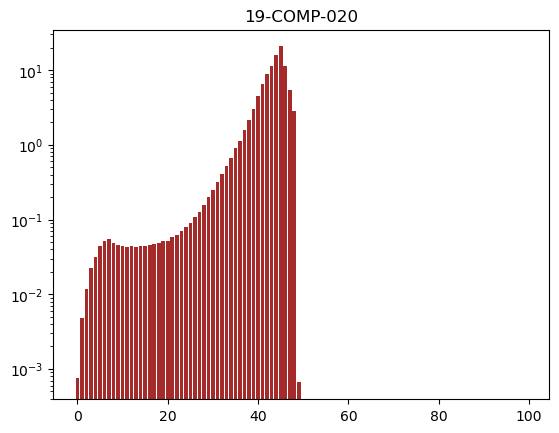

<Figure size 1000x1000 with 0 Axes>

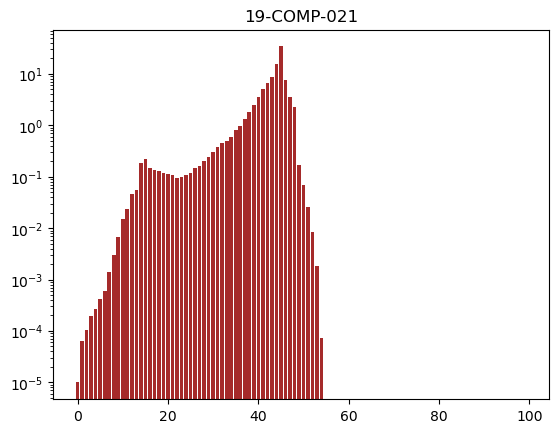

<Figure size 1000x1000 with 0 Axes>

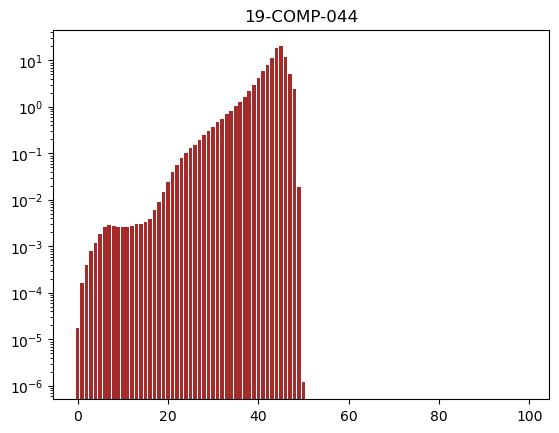

<Figure size 1000x1000 with 0 Axes>

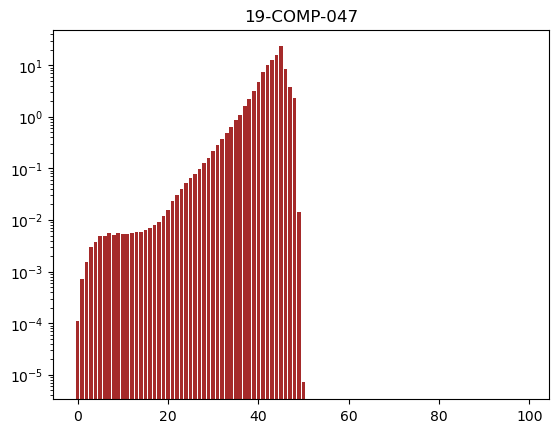

<Figure size 1000x1000 with 0 Axes>

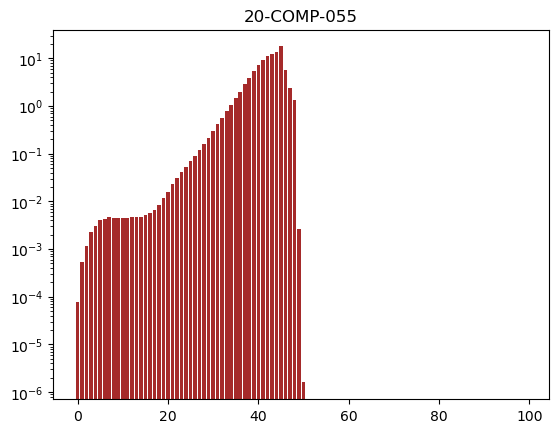

<Figure size 1000x1000 with 0 Axes>

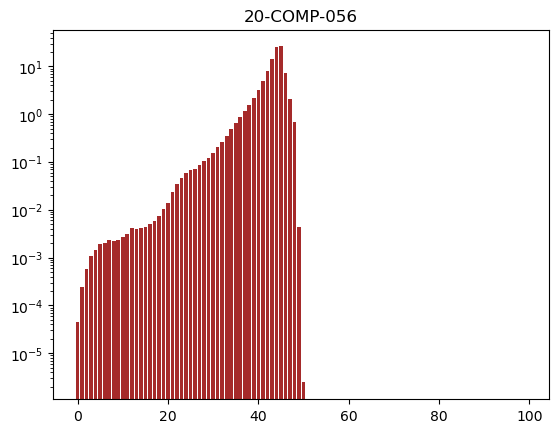

<Figure size 1000x1000 with 0 Axes>

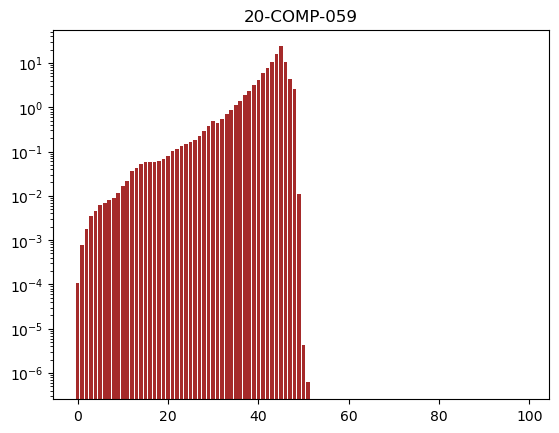

<Figure size 1000x1000 with 0 Axes>

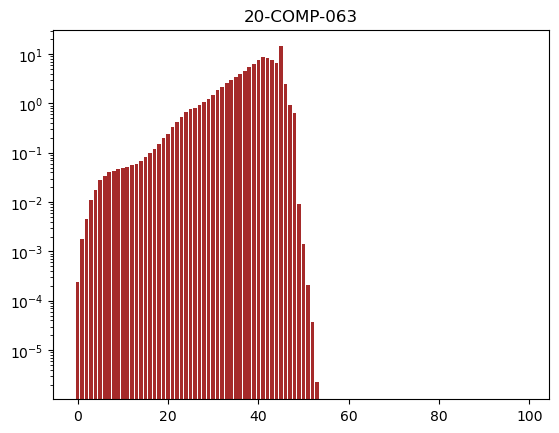

<Figure size 1000x1000 with 0 Axes>

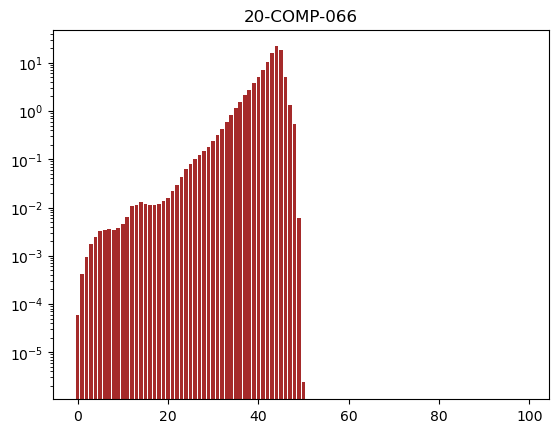

<Figure size 1000x1000 with 0 Axes>

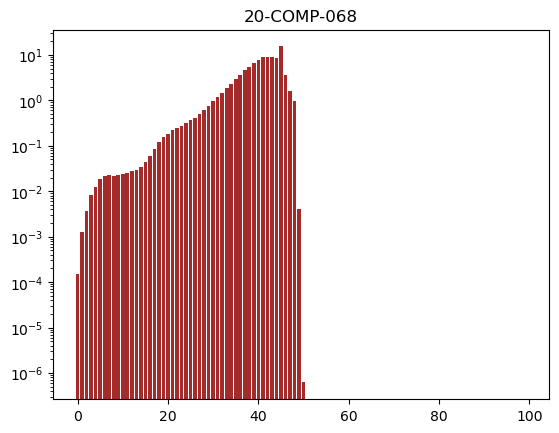

<Figure size 1000x1000 with 0 Axes>

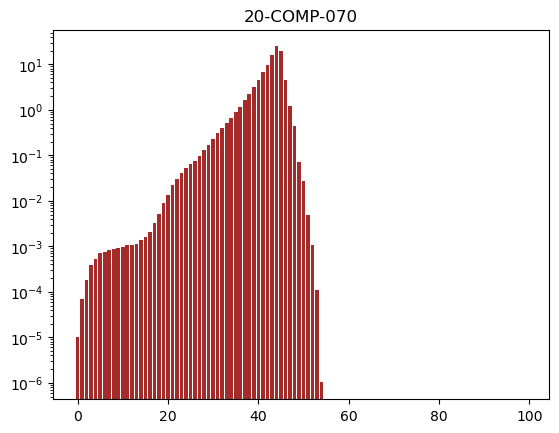

<Figure size 1000x1000 with 0 Axes>

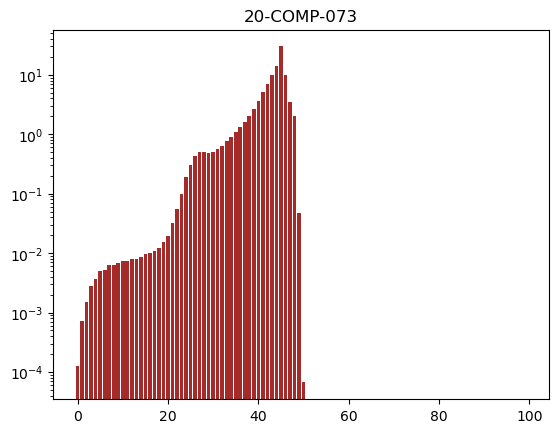

<Figure size 1000x1000 with 0 Axes>

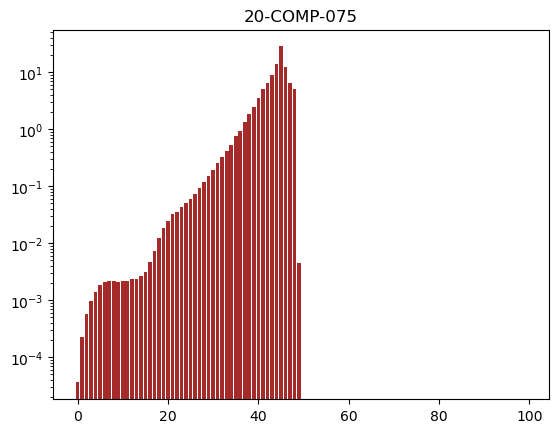

<Figure size 1000x1000 with 0 Axes>

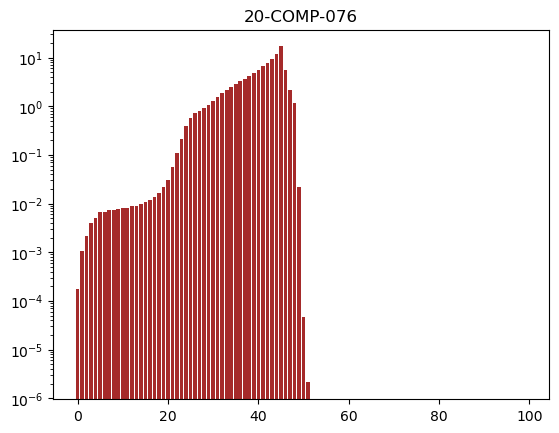

<Figure size 1000x1000 with 0 Axes>

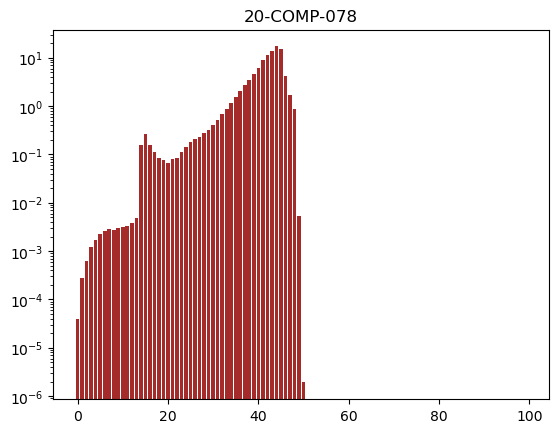

<Figure size 1000x1000 with 0 Axes>

In [6]:
num_bins = 100
wsi_bins_arr = np.load('../ML_models/bins_arr_'+str(num_bins)+'.npy')
for i,slide_name in enumerate(tr_set):
    barContainer = plt.bar(x=range(num_bins), height=wsi_bins_arr[i], color='brown')
    plt.title(slide_name)
    plt.yscale('log')
    plt.figure(figsize=(10, 10))
    plt.show()

Test set

In [6]:
level = 2
ROI_threshold_arr = [0.9, 0.95]
base_brown = [117.3, 88.9, 67.3]
use_normalized = True
num_bins_arr = [200]

for ROI_threshold in ROI_threshold_arr:
    for num_bins in num_bins_arr:
        start_time = time.time()

        wsi_bins_arr = np.empty([len(test_set), num_bins])

        for i, slide_name in enumerate(test_set):
            bins = calculate_pdl1_score_bins(slide_name, level, ROI_threshold, base_brown,
                                             num_bins, use_normalized=use_normalized)
            wsi_bins_arr[i] = bins

        end_time = time.time()
        print('time: ', "{:.0f}".format(end_time - start_time))

        np.save('../ML_models/bins/bins_arr_test_'+str(num_bins)+'r'+str(ROI_threshold)+'.npy', wsi_bins_arr)

../WSI/thesis_WSI/20-COMP-077/20-COMP-077.tiff : col  295  of  296

../WSI/thesis_WSI/20-COMP-065/20-COMP-065.tiff : col  327  of  328

../WSI/thesis_WSI/19-COMP-039/19-COMP-039.tiff : col  335  of  336

../WSI/thesis_WSI/20-COMP-102/20-COMP-102.tiff : col  247  of  248

../WSI/thesis_WSI/19-COMP-037/19-COMP-037.tiff : col  303  of  3046  of  304

../WSI/thesis_WSI/19-COMP-026/19-COMP-026.tiff : col  295  of  296

time:  949
../WSI/thesis_WSI/20-COMP-077/20-COMP-077.tiff : col  295  of  296

../WSI/thesis_WSI/20-COMP-065/20-COMP-065.tiff : col  327  of  328

../WSI/thesis_WSI/19-COMP-039/19-COMP-039.tiff : col  335  of  336

../WSI/thesis_WSI/20-COMP-102/20-COMP-102.tiff : col  247  of  248

../WSI/thesis_WSI/19-COMP-037/19-COMP-037.tiff : col  303  of  304

../WSI/thesis_WSI/19-COMP-026/19-COMP-026.tiff : col  295  of  296

time:  1149


# Manual artifact elimination roi 

In [6]:
level = 2
ROI_threshold_arr = [0.95]
base_brown = [117.3, 88.9, 67.3]
use_normalized = True
num_bins_arr = [100]
use_manual_art = True

artifact_set = ['19-COMP-044', '20-COMP-063', '20-COMP-065', '20-COMP-068']

for ROI_threshold in ROI_threshold_arr:
    for num_bins in num_bins_arr:
        start_time = time.time()
        for i, slide_name in enumerate(artifact_set):
            bins = calculate_pdl1_score_bins(slide_name, level, ROI_threshold,
                                             base_brown, num_bins, use_manual_art=use_manual_art)
            np.save('../ML_models/bins/manual/'+slide_name+'_bins_'+str(num_bins)+'r'+str(ROI_threshold)+'.npy', bins)

        end_time = time.time()
        print('time: ', "{:.0f}".format(end_time - start_time))



../WSI/thesis_WSI/19-COMP-044/19-COMP-044.tiff : col  271  of  272

../WSI/thesis_WSI/20-COMP-063/20-COMP-063.tiff : col  319  of  320

../WSI/thesis_WSI/20-COMP-065/20-COMP-065.tiff : col  327  of  328328

../WSI/thesis_WSI/20-COMP-068/20-COMP-068.tiff : col  343  of  34444

time:  949
